In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
import kagglehub

In [3]:
# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [4]:
csv_file = os.path.join(path, "Mall_Customers.csv") #Used to join the path with / wherever needed
df = pd.read_csv(csv_file)

print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



**Problem Statement**
*   Retail mall - want to understand the customers better
*   Task is to - use Unsupervised ML - specifically Clustering - to segment the customers into meaningful groups



**Why this dataset**


*   Real-world interpretable features
*   No pre-applied PCA transformations
*  Perfect for clustering techniques



In [5]:
## Data Exploration and Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Checking missing values

df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
# Check duplicates

df.duplicated().sum() > 0

# Drop duplictaes

# df.drop_duplicates()

np.False_

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
#Rename the columns

# -- Annual_Income
# -- Specing_Score
df.rename(columns = {'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)' : 'Spending_Score' }, inplace = True)

In [12]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# Encode Gender - Male - 1, Female - 0

# temp_dict ={'Male':1 , 'Female':0}

df['Gender'] = df['Gender'].map({'Male':1 , 'Female':0})
df.head(3)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


# EDA
*   Univariate Analysis - taking each column and looking at the distribution



<Axes: xlabel='Age', ylabel='Count'>

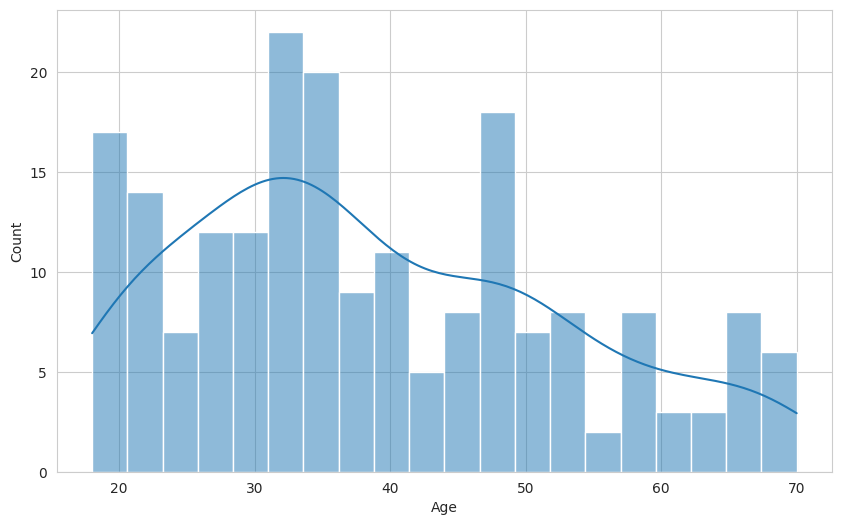

In [14]:
# Numerical columns
# -- Histogram

# Data Visualization Important plots:
# 1. Histogram with kde
# 2. Scatter Plot (pair-wise columns)

sns.histplot(data = df, x = 'Age', bins = 20, kde = True)

<Axes: xlabel='Annual_Income', ylabel='Count'>

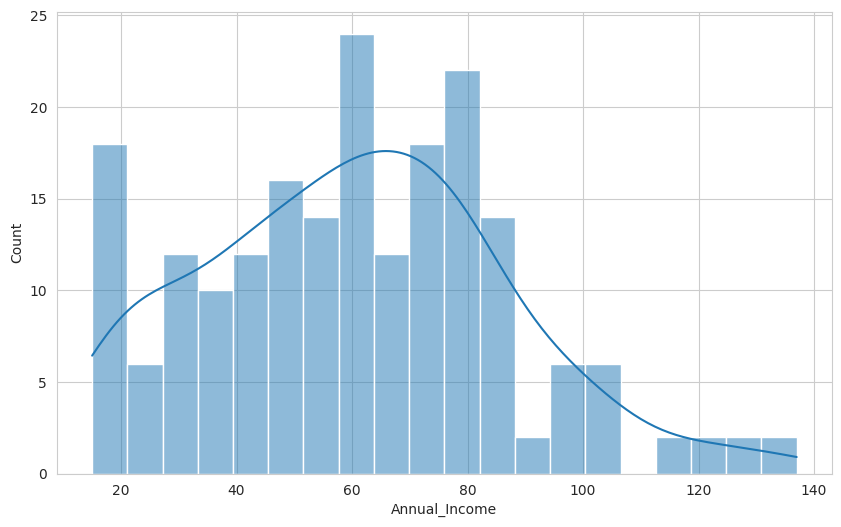

In [15]:
sns.histplot(data = df, x = 'Annual_Income', bins = 20, kde = True)

<Axes: xlabel='Spending_Score', ylabel='Count'>

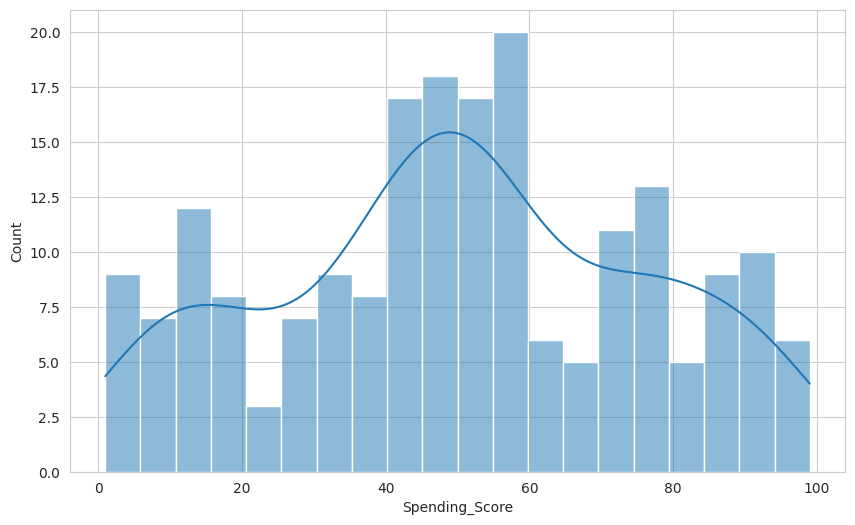

In [16]:
sns.histplot(data = df, x = 'Spending_Score', bins = 20, kde = True)

In [17]:
counts = df['Gender'].value_counts( ) #Frequency of each category in categorical columns

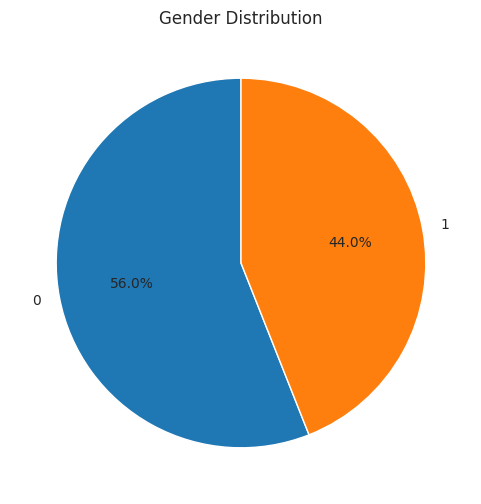

In [18]:
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Gender Distribution")
plt.show()



*   Bi-variate Analysis - taking pair-wise columns ->  scatter plot



<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

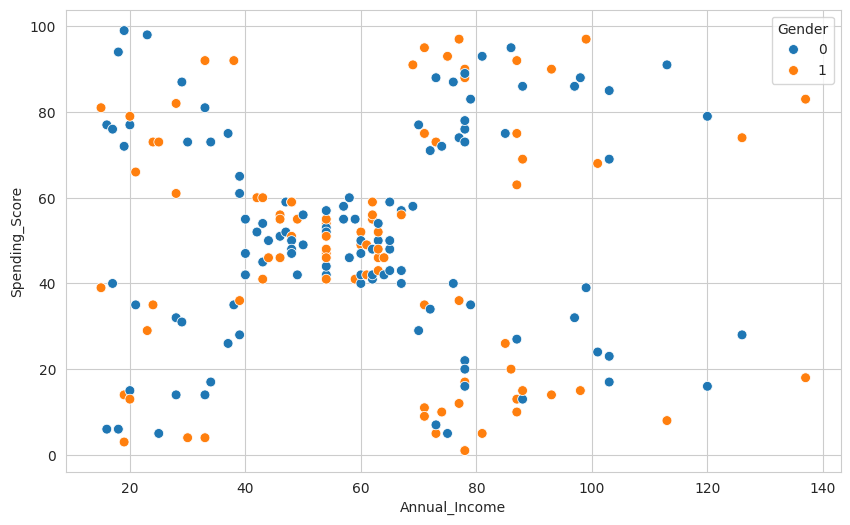

In [19]:
# Scatter plot - Annual Income vs Spending Score

sns.scatterplot(data = df, x = 'Annual_Income', y = 'Spending_Score', hue = 'Gender', s = 50)

<Axes: xlabel='Age', ylabel='Annual_Income'>

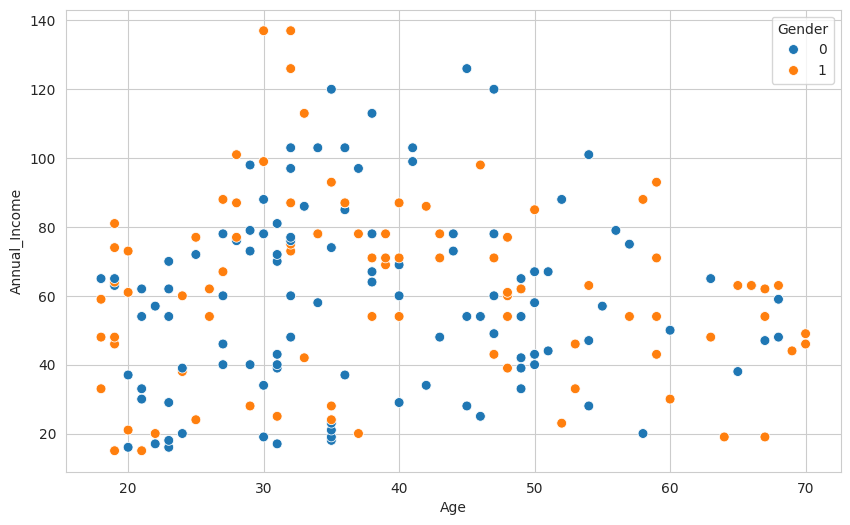

In [20]:
sns.scatterplot(data = df, x = 'Age', y = 'Annual_Income', hue = 'Gender', s = 50)



*   Multivariate Analysis - heatmap



<Axes: >

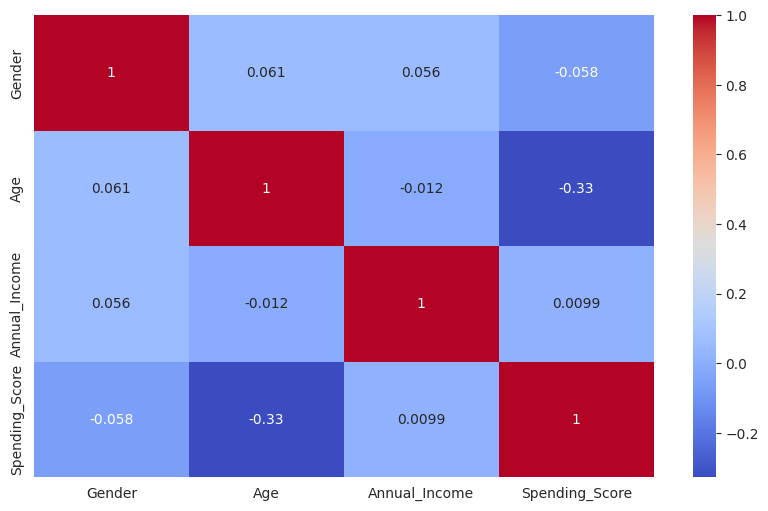

In [21]:
df = df.drop(['CustomerID'], axis = 1)

correlation = df.corr( )

sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

# Dimensionality Reduction

* PCA

In [22]:
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Initialize PCA -> 2 components
pca = PCA(n_components = 4, random_state = 42)
X_pca = pca.fit_transform(df_scaled)

# Calculate expalined-variance-ratio

print(pca.explained_variance_ratio_)

# Plot a scatter plot - PC1 vs PC2



[0.33690046 0.26230645 0.23260639 0.16818671]


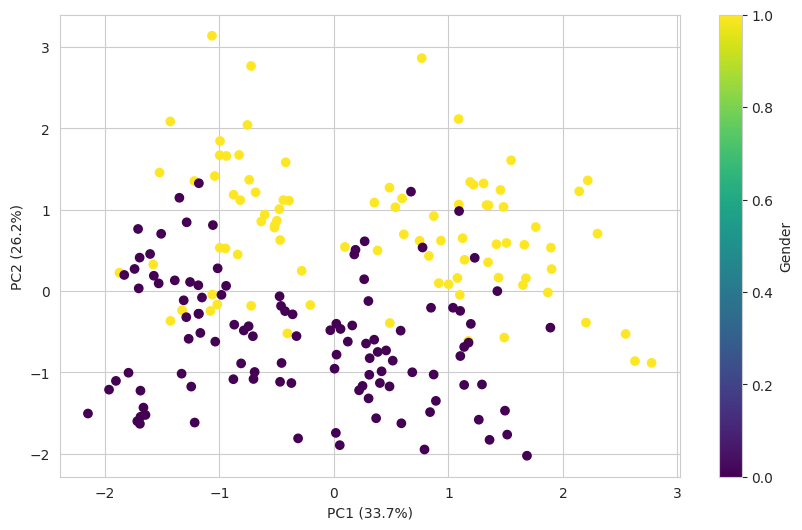

In [23]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Gender'], cmap='viridis')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
plt.colorbar(label='Gender')
plt.show()

In [25]:
# Use tSNE for Data Visualization

# Import the model
from sklearn.manifold import TSNE

# Intialize the model
tsne = TSNE(n_components = 2, perplexity = 30, n_iter = 1000, random_state = 42)

# Fit_transform
X_tsne = tsne.fit_transform(df_scaled)

# Store the results
df['tsne_1'] = X_tsne[:,0]
df['tsne_2'] = X_tsne[:,1]

# Evaluate
df.head()



,Gender,Age,Annual_Income,Spending_Score,tsne_1,tsne_2
0,1,19,15,39,2.425970,-7.152119
1,1,21,15,81,3.042494,-5.478380
2,0,20,16,6,-4.405653,14.091286
3,0,23,16,77,-7.819345,12.497788
4,0,31,17,40,-4.630795,12.384195


<Axes: xlabel='tsne_1', ylabel='tsne_2'>

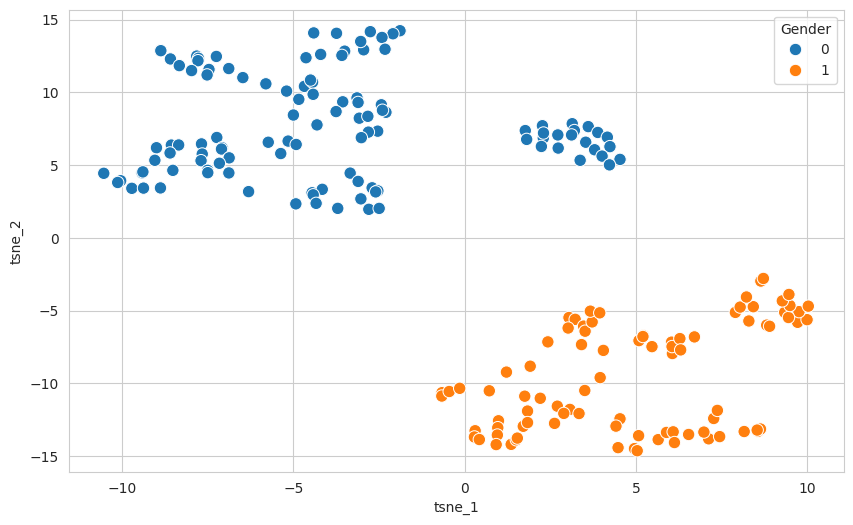

In [27]:
sns.scatterplot(data = df, x = 'tsne_1', y = 'tsne_2', s = 80, hue = 'Gender')

<Axes: xlabel='tsne_1', ylabel='tsne_2'>

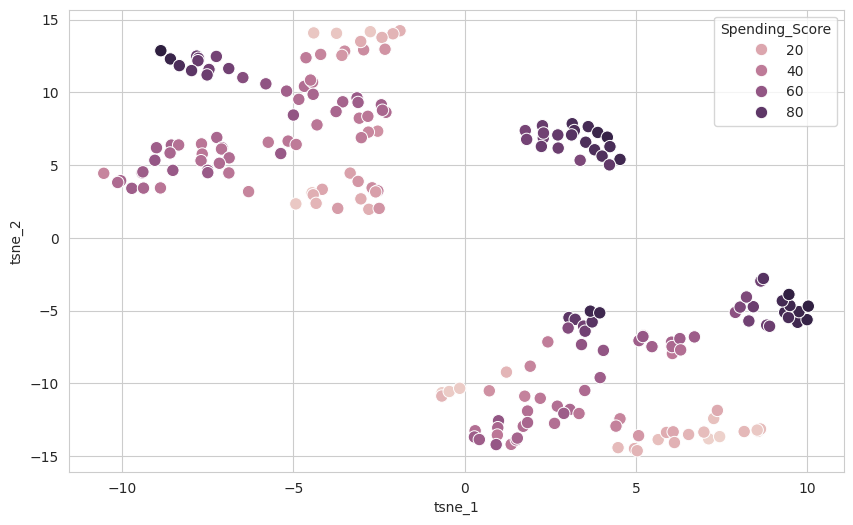

In [29]:
sns.scatterplot(data = df, x = 'tsne_1', y = 'tsne_2', s = 80, hue = 'Spending_Score')

# Anomaly Detection

In [30]:
# IQR - Inter Quartile Range -> Annual Income and Spending Score

X_anomaly = df[['Annual_Income', 'Spending_Score']]
X_anomaly.head(3)

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6


In [32]:
Q1 = X_anomaly.quantile(0.25)
Q3 = X_anomaly.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((X_anomaly < lower_bound) | (X_anomaly > upper_bound)).any(axis = 1)

print(outliers.sum())

2


In [33]:
X_anomaly[outliers]

,Annual_Income,Spending_Score
198,137,18
199,137,83


In [45]:
# z-score

# Threshold = 3 or 2

threshold = 2

for col in X_anomaly.columns :
    mean = X_anomaly[col].mean()
    std = X_anomaly[col].std()

    z_score = (X_anomaly[col] - mean) / std

    outliers = z_score.abs() > threshold
    print(col, '-> ', outliers.sum())

Annual_Income ->  6
Spending_Score ->  0


In [46]:
# Isolation Forest

from sklearn.ensemble import IsolationForest

# Initialize the model

iso_forest = IsolationForest(contamination = 0.05, random_state = 42)
iso_predictions = iso_forest.fit_predict(df_scaled)

iso_predictions

array([-1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1])

In [47]:
iso_outliers = iso_predictions == -1
print(iso_outliers.sum())

10


In [ ]:
# Homework - Visualize normal data points vs Noise/Outliers points

In [49]:
# LOF

from sklearn.neighbors import LocalOutlierFactor


lof = LocalOutlierFactor(n_neighbors = 20, contamination = 0.05)
lof_predictions = lof.fit_predict(df_scaled)

lof_outliers = lof_predictions == -1

In [50]:
print(lof_outliers.sum())

10


# Clustering Algorithms

In [51]:
# 1. k-means

# Import
# For different values of k -> Initialize, fit_predict , inertia_
# Plot the elbow curve

from sklearn.cluster import KMeans
inertias = []

for k in range(2,11):
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(df_scaled)
  inertias.append(kmeans.inertia_)

print(inertias)


[597.9472937932284, 494.8037500130456, 395.3920903479796, 351.7432061711911, 277.3897401985192, 251.15484911190165, 211.98576294959312, 185.72807688711433, 152.02983429775693]


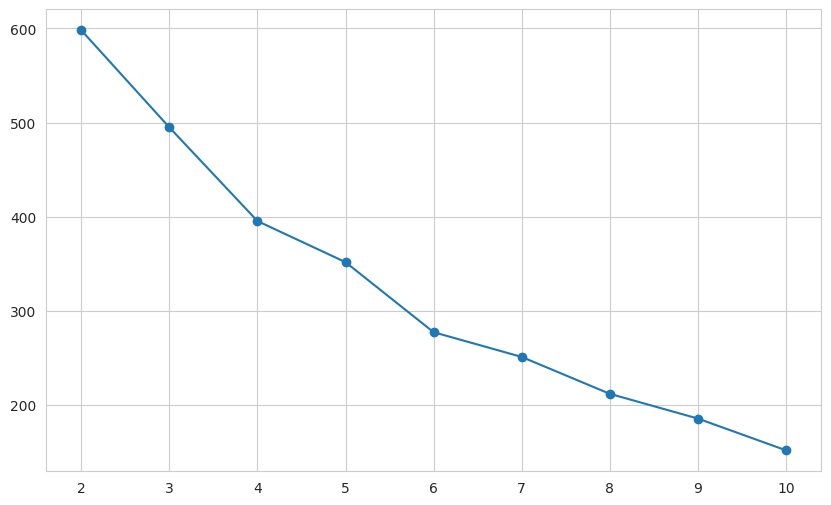

In [53]:
plt.plot(range(2,11), inertias, marker = 'o')

In [54]:
# Assumption: Optimal Value of k is 5

<Axes: >

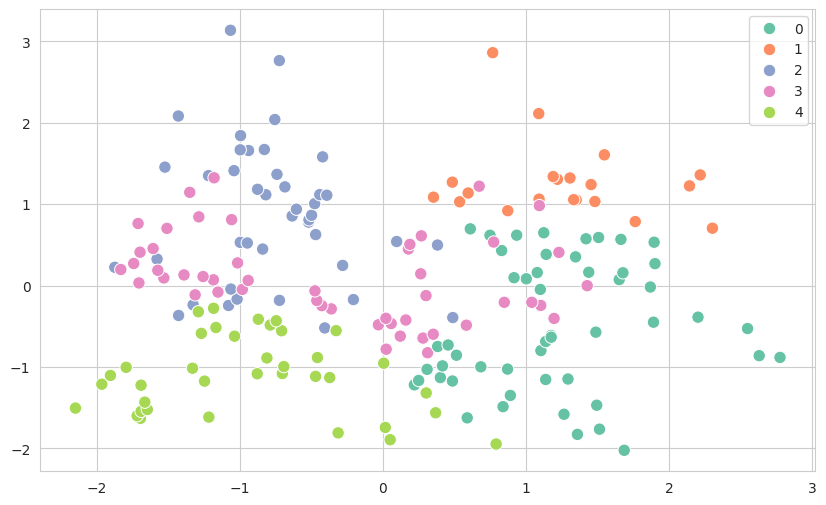

In [56]:
  kmeans = KMeans(n_clusters = 5, random_state = 42)
  kmeans_labels = kmeans.fit_predict(df_scaled)

sns.scatterplot(data = df, x = X_pca[:, 0] , y = X_pca[:, 1] , palette = 'Set2', s = 80, hue = kmeans_labels)

<Axes: >

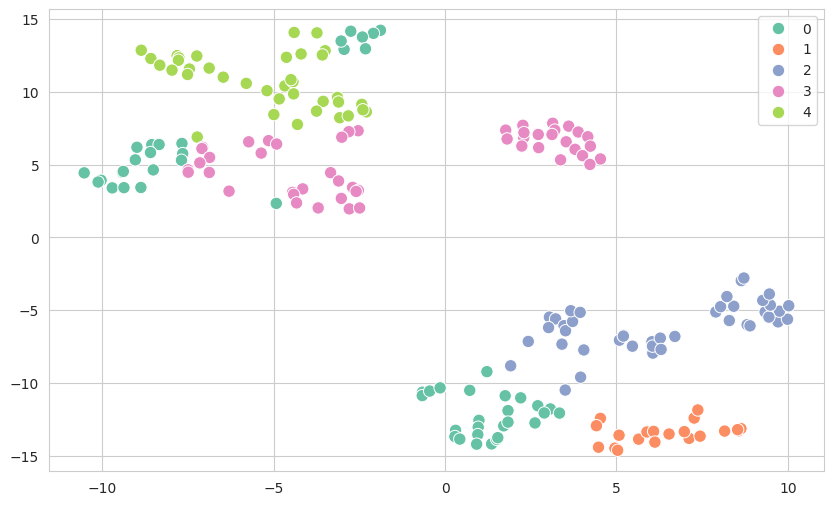

In [57]:
sns.scatterplot(data = df, x = X_tsne[:, 0] , y = X_tsne[:, 1] , palette = 'Set2', s = 80, hue = kmeans_labels)

In [58]:
# Domain Knowledge -> 5
# Elbow Curve -> 5
# Homework - Silhouttte Curve ->

**Customer Segmentation**



*   Cluster 0 -> High value customers -> High Income and High Spending
* Cluster 1 -> Wealthy but conservative customers
* Cluster 2 -> Average Income and Spending
* Cluster 3 -> Low income but High Spending
* Cluster 4 -> Low Income and Low Spending

<Axes: >

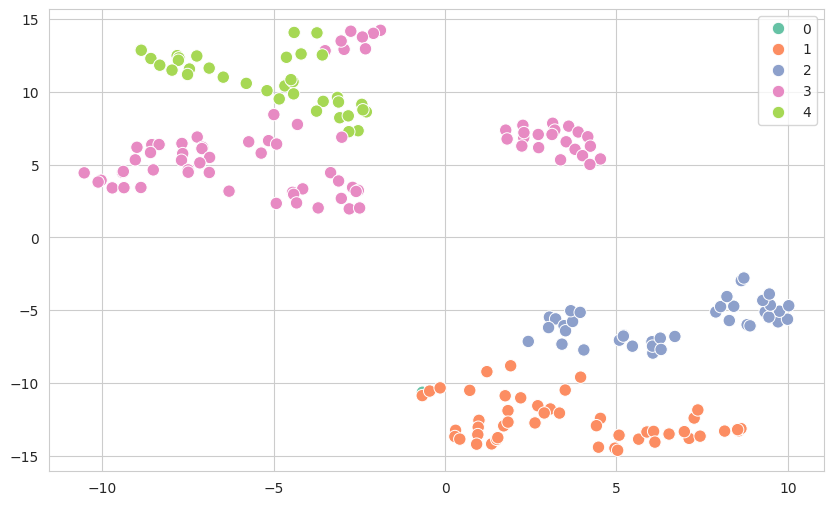

In [59]:
# GMM

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 5, random_state = 42)
gmm_labels = gmm.fit_predict(df_scaled)

sns.scatterplot(data = df, x = X_tsne[:, 0] , y = X_tsne[:, 1] , palette = 'Set2', s = 80, hue = gmm_labels)

In [60]:
# DBSCAN

<Axes: >

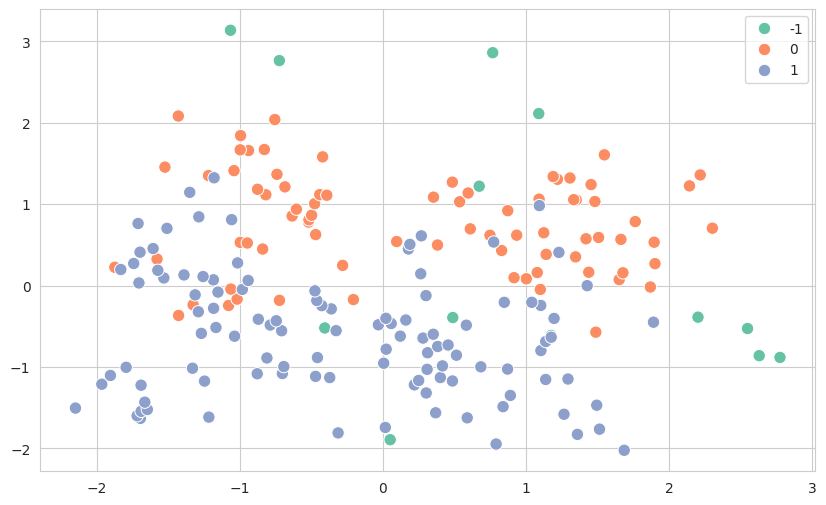

In [65]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 1, min_samples = 6)
dbscan_labels = dbscan.fit_predict(df_scaled)

sns.scatterplot(data = df, x = X_pca[:,0], y = X_pca[:,1], palette = 'Set2', s =80, hue = dbscan_labels)

<Axes: >

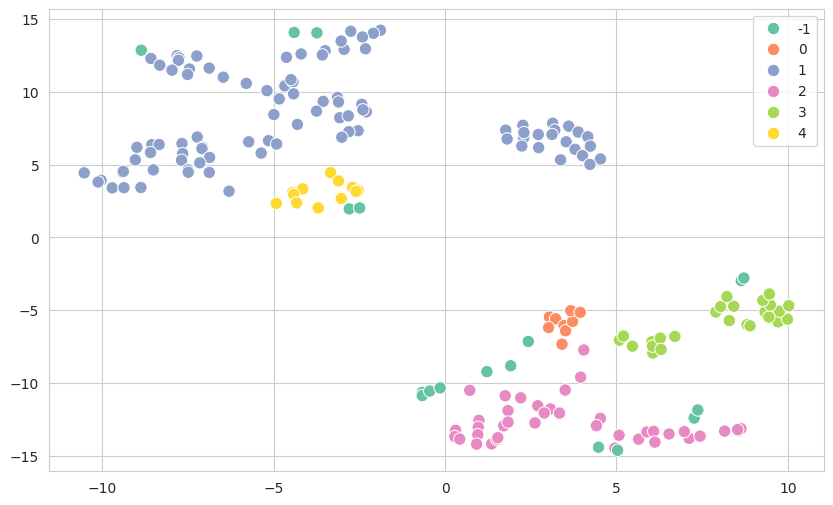

In [63]:
sns.scatterplot(data = df, x = X_tsne[:,0], y = X_tsne[:,1], palette = 'Set2', s =80, hue = dbscan_labels)

1. DIMENSIONALITY REDUCTION:
   - PCA: Linear transformation, preserves global structure, fast
   - t-SNE: Non-linear, preserves local structure, better for visualization

2. CLUSTERING:
   - K-Means: Fast, requires K specification, assumes spherical clusters
   - GMM: Probabilistic (soft clustering), handles elliptical clusters
   - DBSCAN: Density-based, automatically finds outliers, no K needed

3. ANOMALY DETECTION:
   - IQR & Z-Score: Simple, univariate/multivariate statistical methods
   - Isolation Forest: Fast, effective for high-dimensional data
   - LOF: Detects local density deviations, great for varying densities

4. BUSINESS VALUE:
   - Customer segmentation helps target marketing campaigns
   - Anomaly detection identifies unusual behavior (fraud, VIP customers)
   - Dimensionality reduction enables visualization of complex data
""")